In [1]:
import theano
import theano.tensor as T

x1 = T.scalar()
w1 = T.scalar()
w0 = T.scalar()
z1 = x1 * w1 + w0

net_input = theano.function(inputs=[w1, w0, x1], outputs=z1)

net_input(1,2,3)

array(5.0)

In [2]:
theano.config.floatX

'float64'

dung THEANO_FLAGS de config theano truoc moi lan chay

# Working with array structures

In [3]:
x = T.dmatrix()
x_sum = T.sum(x, axis=0)
calc = theano.function(inputs=[x], outputs=x_sum)
a = [[1,2,3,4],[4,5,6,7]]
import numpy as np
b = np.array(a, dtype=np.float64)
print(calc(a))
print(calc(b))

[  5.   7.   9.  11.]
[  5.   7.   9.  11.]


In [4]:
x = T.dmatrix('x')
w = theano.shared(np.asarray([[0.0, 0.0, 0.0]]))
z = x.dot(w.T)
update = [[w, w + 1.0]]
run = theano.function(inputs=[x],
                     updates=update,
                     outputs = [z])
raw_input = np.array([[1.0, 2.0, 3.0]])
for _ in range(5):
    print(run(raw_input))

[array([[ 0.]])]
[array([[ 6.]])]
[array([[ 12.]])]
[array([[ 18.]])]
[array([[ 24.]])]


In [5]:
x = T.dmatrix('x')
w = theano.shared(np.asarray([[0.0, 0.0, 0.0]]))
z = x.dot(w.T)
update = [[w, w + 1.0]]
raw_input = np.array([[1.0, 2.0, 3.0]])
run = theano.function(inputs=[],
                     updates=update,
                      givens = {x:raw_input},
                     outputs = z)
for _ in range(5):
    print(run())

[[ 0.]]
[[ 6.]]
[[ 12.]]
[[ 18.]]
[[ 24.]]


# Wrapping things up – a linear regression example

In [6]:
X_train = np.asarray([[0.0], [1.0],
                      [2.0], [3.0],
                      [4.0], [5.0],
                      [6.0], [7.0],
                      [8.0], [9.0]])
y_train = np.asarray([1.0, 1.3,
                      3.1, 2.0,
                      5.0, 6.3,
                      6.6, 7.4,
                      8.0, 9.0])

In [21]:
def train_linreg(X_train, y_train, eta, epochs):
    costs = []
    eta0 = T.dscalar('eta0')
    y = T.dvector(name='y')
    X = T.dmatrix(name='X')
    W = theano.shared(np.zeros(
                    shape=(X_train.shape[1] + 1)),
                    name="W" )
    net_input = T.dot(X, W[1:]) + W[0]
    errors = y - net_input
    cost = T.sum(T.pow(errors, 2))
    gradient = T.grad(cost, wrt=W)
    update = [(W, W- eta0 * gradient)]
    
    train = theano.function(inputs=[eta0],
                           outputs=cost,
                           updates = update,
                           givens ={X: X_train,
                                   y:y_train})
    for _ in range(epochs):
        costs.append(train(eta))
    return costs, W

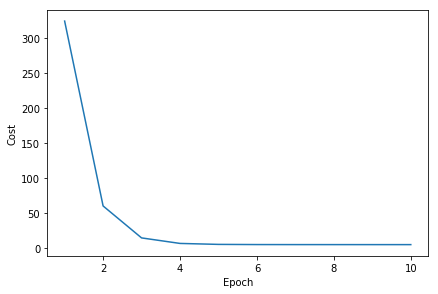

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
costs, w = train_linreg(X_train, y_train, 0.001, 10)
plt.plot(range(1, len(costs)+1), costs)
plt.tight_layout()
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

In [23]:
def predict_linreg(X, w):
    Xt = T.matrix(name='X')
    net_input = T.dot(Xt, w[1:]) + w[0]
    predict = theano.function(inputs=[Xt],
    givens={w: w},
    outputs=net_input)
    return predict(X)

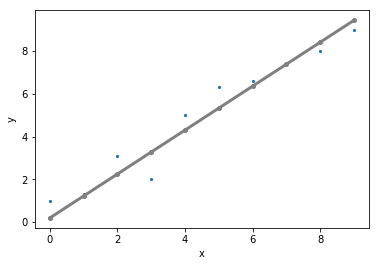

In [25]:
plt.scatter(X_train, y_train, marker='x', s=5)
plt.plot(range(X_train.shape[0]), 
         predict_linreg(X_train, w),
         color="gray", marker="o",
         markersize=4, linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Choosing activation functions for feedforward neural networks
## Logistic function recap
$ \sigma(z) = \frac{1}{1+e^{-z}} $

In [26]:
def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))
W = np.array([[1.1, 1.2, 1.3, 0.5],
              [0.1, 0.2, 0.4, 0.1],
              [0.2, 0.5, 2.1, 1.9]])
A = np.array([[1.0],
             [0.1],
             [0.3],
             [0.7]])
Z = W.dot(A)
y_probas = logistic(Z)
print(y_probas)

[[ 0.87653295]
 [ 0.57688526]
 [ 0.90114393]]


## Estimating probabilities in multi-class classification via the softmax 
$ P(y=i|z) = \phi_{softmax}(z) = \frac{e_i^z}{\sum_{m=1}^me_m^z} $

In [30]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))
softmax(Z)

array([[ 0.40386493],
       [ 0.07756222],
       [ 0.51857284]])

## Broadening the output spectrum by using a hyperbolic tangent (tanh)
$ \phi_{tanh}(z) = 2\times\phi_{logistic}(2\times z)-1=\frac{e^z - e^{-z}}{e^z + e^{-z}} $

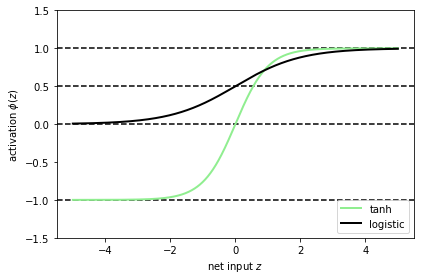

In [31]:
def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)
z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0.5, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(-1, color='black', linestyle='--')
plt.plot(z, tanh_act,
        linewidth=2,
        color="lightgreen",
        label="tanh")
plt.plot(z, log_act,
        linewidth=2,
        color="black",
        label="logistic")
plt.legend(loc="lower right")
plt.tight_layout()

# Training neural networks efficiently using Keras

In [39]:
import os
import struct
import numpy as np

def load_mnist(path, kind="train"):
    labels_path = os.path.join(path,
                              "%s-labels.idx-ubyte" %kind)
    images_path = os.path.join(path,
                              "%s-images.idx-ubyte" %kind)
    with open(labels_path, "rb") as lbpath:
        magic, n = struct.unpack('>II',
                                lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
 
    return images, labels

In [40]:
X_train, y_train = load_mnist('data', kind="train")

In [42]:
 X_test, y_test = load_mnist('data', kind='t10k')

In [43]:
import theano 

theano.config.floatX = 'float32'
X_train = X_train.astype(theano.config.floatX)
X_test = X_test.astype(theano.config.floatX)

In [44]:
from keras.utils import np_utils

print('First 3 labels: ', y_train[:3])

y_train_ohe = np_utils.to_categorical(y_train) 
print('\nFirst 3 labels (one-hot):\n', y_train_ohe[:3])

First 3 labels:  [5 0 4]

First 3 labels (one-hot):
 [[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [47]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(1) 

model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], 
                output_dim=50, 
                init='uniform', 
                activation='tanh'))

model.add(Dense(input_dim=50, 
                output_dim=50, 
                init='uniform', 
                activation='tanh'))

model.add(Dense(input_dim=50, 
                output_dim=y_train_ohe.shape[1], 
                init='uniform', 
                activation='softmax'))

sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(X_train, y_train_ohe, 
          nb_epoch=50, 
          batch_size=300, 
          verbose=1, 
          validation_split=0.1)

/home/jeovach/.local/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", input_dim=784, activation="tanh", units=50)`
/home/jeovach/.local/lib/python3.5/site-packages/ipykernel/__main__.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", input_dim=50, activation="tanh", units=50)`
/home/jeovach/.local/lib/python3.5/site-packages/ipykernel/__main__.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", input_dim=50, activation="softmax", units=10)`
/home/jeovach/anaconda3/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 2s - loss: 2.2207 - val_loss: 2.0860
Epoch 2/50
54000/54000 [==============================] - 1s - loss: 1.8295 - val_loss: 1.5054
Epoch 3/50
54000/54000 [==============================] - 1s - loss: 1.2996 - val_loss: 1.0746
Epoch 4/50
54000/54000 [==============================] - 1s - loss: 0.9792 - val_loss: 0.8197
Epoch 5/50
54000/54000 [==============================] - 1s - loss: 0.7766 - val_loss: 0.6529
Epoch 6/50
54000/54000 [==============================] - 1s - loss: 0.6423 - val_loss: 0.5392
Epoch 7/50
54000/54000 [==============================] - 1s - loss: 0.5546 - val_loss: 0.4714
Epoch 8/50
54000/54000 [==============================] - 1s - loss: 0.4937 - val_loss: 0.4203
Epoch 9/50
54000/54000 [==============================] - 1s - loss: 0.4481 - val_loss: 0.3789
Epoch 10/50
54000/54000 [==============================] - 1s - loss: 0.4160 - val_loss: 0.3607


In [48]:
y_train_pred = model.predict_classes(X_train, verbose=0)
print(y_train_pred[:3])

[3 0 4]


In [49]:
train_acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (train_acc * 100))

Training accuracy: 94.07%


In [50]:
y_test_pred = model.predict_classes(X_test, verbose=0)
test_acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (test_acc * 100))

Test accuracy: 93.59%
